# Doctor's Consultation Fee

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_set = pd.read_excel('Final_Train.xlsx')
test_set = pd.read_excel('Final_Test.xlsx')

In [3]:
train_set.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test_set.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
train_set.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
test_set.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [7]:
# combining both of the sets ( Train and Test) for preprocesing
df = train_set.append(test_set)

In [8]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [10]:
df.isnull().mean()*100

Qualification          0.000000
Experience             0.000000
Rating                55.259185
Place                  0.390035
Profile                0.000000
Miscellaneous_Info    43.457474
Fees                  25.000000
dtype: float64

### Data Processing

In [11]:
df_copy = df.copy()

In [12]:
df_copy.drop(columns = ['Rating','Miscellaneous_Info'],inplace = True)

In [13]:
df_copy.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,250.0


In [14]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


# EDA

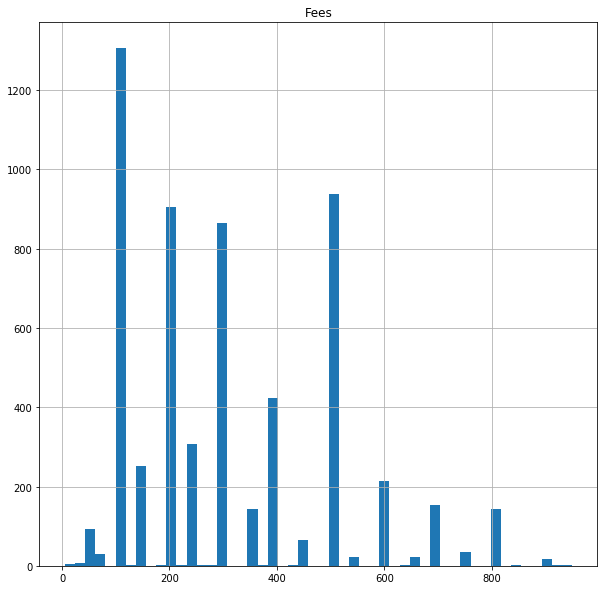

In [15]:
df.hist(bins=50, figsize = (10,10))
plt.show()

In [16]:
df.Qualification.value_counts()

BDS                                                                                                                                          632
BHMS                                                                                                                                         627
BAMS                                                                                                                                         624
MBBS                                                                                                                                         441
MBBS, MS - ENT                                                                                                                               280
                                                                                                                                            ... 
DHMS (Diploma in Homeopathic Medicine and Surgery), BSc - Zoology                                                                 

In [17]:
df_copy.Qualification = df.Qualification.apply(lambda x:x.split(",")[0])

In [18]:
df_copy.Qualification.value_counts()

MBBS                     3313
BDS                      1579
BAMS                      939
BHMS                      938
MD - Dermatology          102
                         ... 
DNB - General Surgery       1
DNB - Paediatrics           1
PhD - Neuropsychology       1
M.Ch                        1
39 years experience         1
Name: Qualification, Length: 181, dtype: int64

In [19]:
df_copy[~df_copy.Qualification.isin(['MBBS', 'BDS', 'BAMS', 'BHMS'])]['Qualification'].apply(lambda x:x.split(" ")[0])

3           BSc
9           BSc
20          MDS
29      Diploma
33           DM
         ...   
1966         MD
1967        MDS
1970        MDS
1980        MDS
1983         MD
Name: Qualification, Length: 1179, dtype: object

In [20]:
df_copy.Qualification = df_copy.Qualification.apply(lambda x: x.split(' ')[0])

In [21]:
df_copy.Qualification.value_counts()

MBBS        3313
BDS         1579
BAMS         939
BHMS         938
MD           418
            ... 
MA             1
FPFA           1
M.             1
BPTh/BPT       1
Member         1
Name: Qualification, Length: 83, dtype: int64

In [22]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD', 'MDS', 'MS']

In [23]:
df_copy.Qualification = df_copy.Qualification.mask(~df_copy.Qualification.isin(main_qualications),'Other')

In [24]:
df_copy.Qualification.value_counts()

MBBS     3313
BDS      1579
BAMS      939
BHMS      938
MD        418
Other     390
MDS       225
MS        146
Name: Qualification, dtype: int64

We can see that Maximum doctors are MBBS followed by BDS

In [25]:
df.Experience.value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
58 years experience      1
60 years experience      1
66 years experience      1
61 years experience      1
64 years experience      1
Name: Experience, Length: 64, dtype: int64

In [26]:
df_copy.Experience = df.Experience.str.extract('(\d+)')
df_copy.rename(columns={'Experience':'Yrs_of_Exp'},inplace=True)

In [27]:
df_copy.head()

,Qualification,Yrs_of_Exp,Place,Profile,Fees
0,BHMS,24,"Kakkanad, Ernakulam",Homeopath,100.0
1,BAMS,12,"Whitefield, Bangalore",Ayurveda,350.0
2,MBBS,9,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,Other,12,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250.0


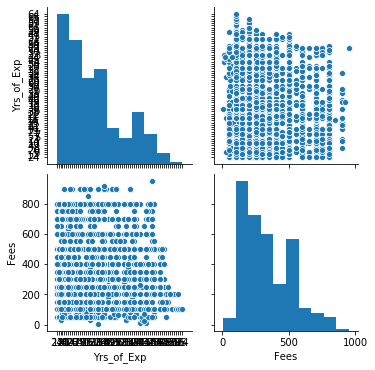

In [28]:
sns.pairplot(df_copy)

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Yrs_of_Exp     7948 non-null   object 
 2   Place          7917 non-null   object 
 3   Profile        7948 non-null   object 
 4   Fees           5961 non-null   float64
dtypes: float64(1), object(4)
memory usage: 532.6+ KB


In [30]:
#type conversion
df_copy.Yrs_of_Exp = df_copy.Yrs_of_Exp.astype('int64')
df_copy

,Qualification,Yrs_of_Exp,Place,Profile,Fees
0,BHMS,24,"Kakkanad, Ernakulam",Homeopath,100.0
1,BAMS,12,"Whitefield, Bangalore",Ayurveda,350.0
2,MBBS,9,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,Other,12,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250.0
...,...,...,...,...,...
1982,BAMS,10,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,MD,4,"Choolai, Chennai",Dermatologists,NaN
1984,MBBS,9,"Porur, Chennai",General Medicine,NaN
1985,BDS,12,"Arekere, Bangalore",Dentist,NaN


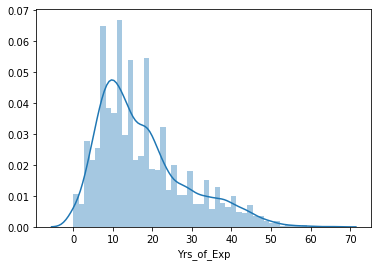

In [31]:
sns.distplot(df_copy['Yrs_of_Exp'])

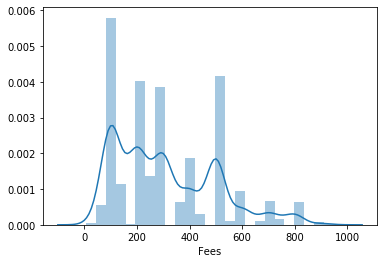

In [32]:
sns.distplot(df_copy['Fees'])

In [33]:
df_copy.Yrs_of_Exp.dtype

dtype('int64')

In [34]:
import scipy.stats as stats

def diagnostic_plots(df_copy, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df_copy[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df_copy[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_copy[variable])
    plt.title('Boxplot')

    plt.show()

******* Yrs_of_Exp *******


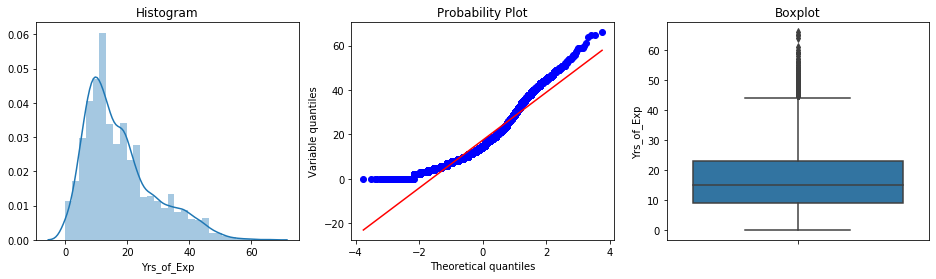

******* Fees *******


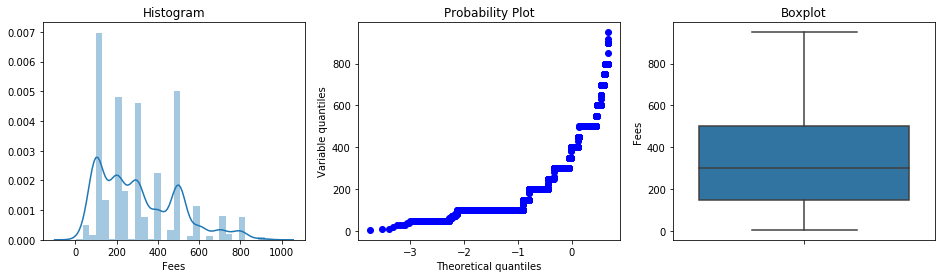

In [35]:
#  Checking the outliers

for var in ['Yrs_of_Exp', 'Fees']:
  print("******* {} *******".format(var))
  diagnostic_plots(df_copy, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [36]:
df_copy.Place.value_counts()

Andheri West, Mumbai              97
HSR Layout, Bangalore             97
Dwarka, Delhi                     93
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                  ..
Eroor South, Ernakulam             1
Ram Nagar, Delhi                   1
Koramangala 2 Block, Bangalore     1
Chandrayangutta, Hyderabad         1
Cumballa Hill, Mumbai              1
Name: Place, Length: 948, dtype: int64

In [37]:
df_copy.Place.isna().sum()

31

In [38]:
df_copy.Place.fillna(df_copy.Place.mode()[0], inplace = True)

In [39]:
df_copy.Place.value_counts()

Andheri West, Mumbai              128
HSR Layout, Bangalore              97
Dwarka, Delhi                      93
Banjara Hills, Hyderabad           85
Mulund West, Mumbai                81
                                 ... 
Eroor South, Ernakulam              1
Ram Nagar, Delhi                    1
Koramangala 2 Block, Bangalore      1
Chandrayangutta, Hyderabad          1
Cumballa Hill, Mumbai               1
Name: Place, Length: 948, dtype: int64

In [40]:
df_copy.Place = df_copy.Place.apply(lambda x : x.split(' ')[-1])

In [41]:
df_copy.Place.value_counts()

Bangalore             1678
Mumbai                1639
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

In [42]:
df_copy = df_copy[df_copy.Place != 'e']

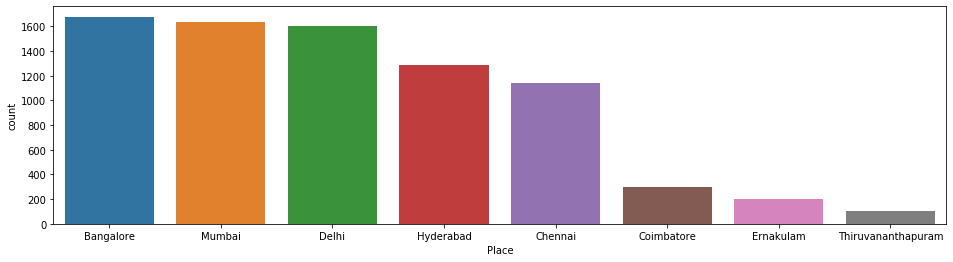

In [43]:
plt.figure(figsize = (16,4))
sns.countplot(df_copy['Place'], order=df_copy.Place.value_counts().index)

We can see that metro cities have higher fees

In [44]:
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

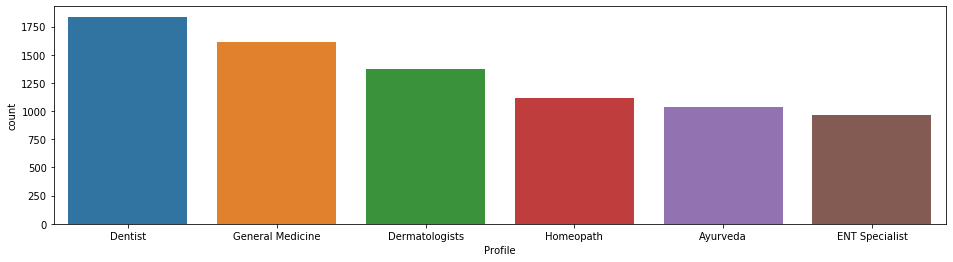

In [45]:
plt.figure(figsize = (16,4))
sns.countplot(df.Profile,order=df.Profile.value_counts().index)

As we can see majority of the doctors are Dentist

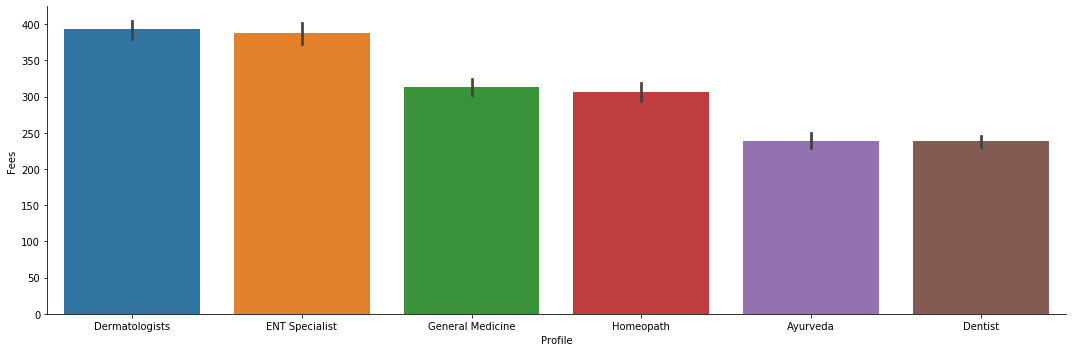

In [46]:
sns.catplot(x='Profile',y='Fees',data=df_copy,kind='bar',aspect=3,
            order=df_copy.groupby('Profile')['Fees'].mean().sort_values(ascending=False).index)

We can see that Derm and ENT have the highest fees

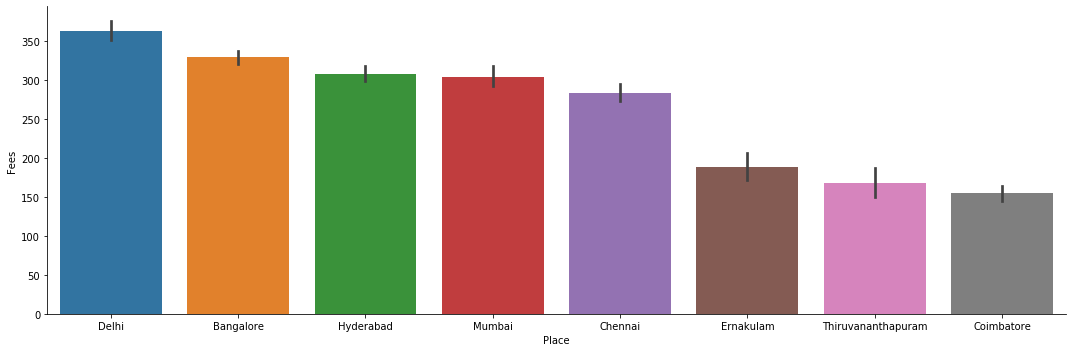

In [47]:
sns.catplot(x='Place',y='Fees',data=df_copy,kind='bar',aspect=3,
            order=df_copy.groupby('Place')['Fees'].mean().sort_values(ascending=False).index)

We can see that Delhi and Banglore has the highest fees

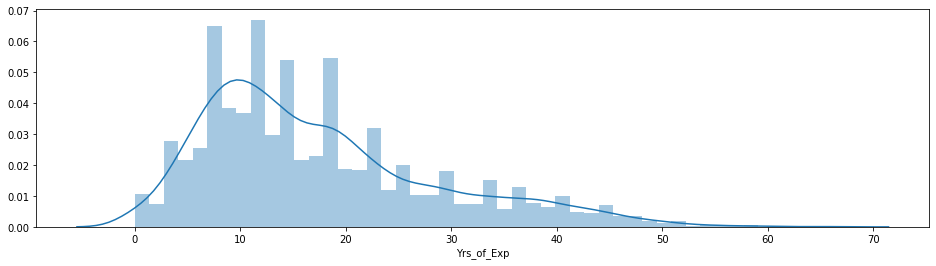

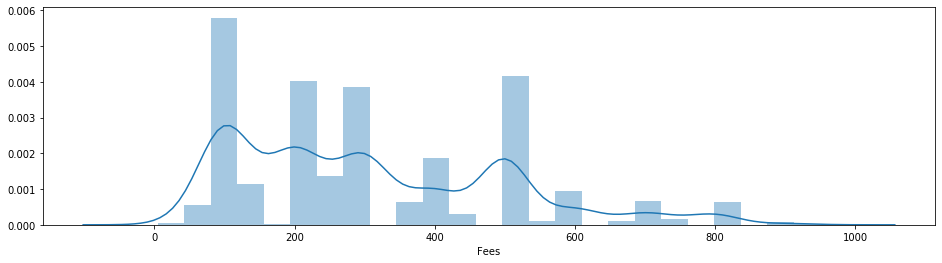

In [48]:
num_var = ['Yrs_of_Exp','Fees']
for col in num_var:
    plt.figure(figsize = (16,4))
    sns.distplot(df_copy[col])

As we see that the data is skewed 

In [49]:
# Checking the skewness 
df_copy.skew()

Yrs_of_Exp    0.984380
Fees          0.751676
dtype: float64

In [50]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_copy[num_var]).skew()

Yrs_of_Exp    0.073915
Fees          0.245076
dtype: float64

In [51]:
# Finalysing the Sqrt Transformation 
df_copy[num_var] = np.sqrt(df_copy[num_var])

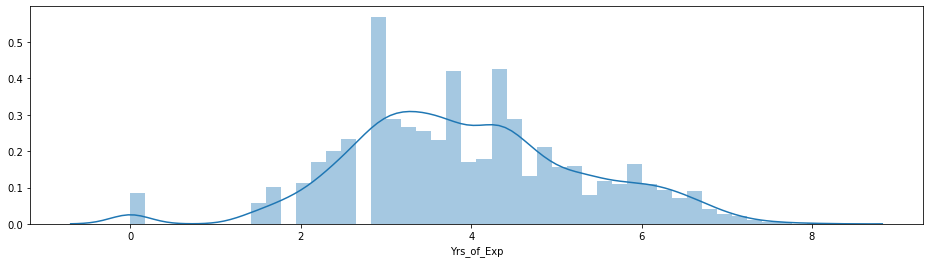

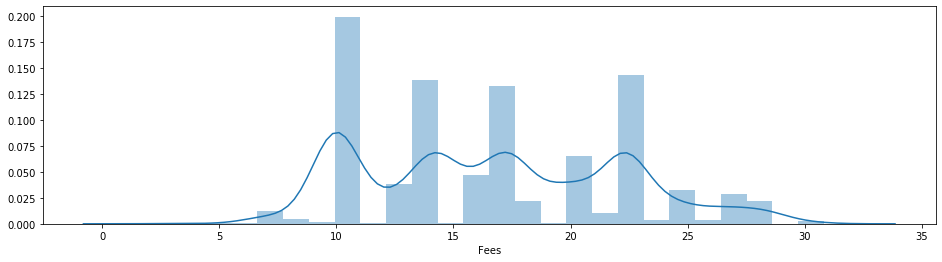

In [52]:
num_var = ['Yrs_of_Exp','Fees']
for col in num_var:
    plt.figure(figsize = (16,4))
    sns.distplot(df_copy[col])

### Encoding the Categorical Features 

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [54]:
# convert rest of categorical variable into dummy
df_copy = pd.get_dummies(df_copy, drop_first=True)

In [55]:
df_copy.head()

,Yrs_of_Exp,Fees,Qualification_BDS,Qualification_BHMS,Qualification_MBBS,Qualification_MD,Qualification_MDS,Qualification_MS,Qualification_Other,Place_Chennai,...,Place_Delhi,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,4.898979,10.000000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.464102,18.708287,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.000000,17.320508,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.464102,15.811388,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.472136,15.811388,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_copy_col = list(df_copy.columns)
df_copy_col.remove('Fees')
for col in df_copy_col:
    df_copy[col] = df_copy[col].astype(float)
    df_copy[[col]] = scaler.fit_transform(df_copy[[col]])

In [57]:
df_copy.head()

,Yrs_of_Exp,Fees,Qualification_BDS,Qualification_BHMS,Qualification_MBBS,Qualification_MD,Qualification_MDS,Qualification_MS,Qualification_Other,Place_Chennai,...,Place_Delhi,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,3.015113,10.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2.132007,18.708287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.846372,17.320508,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,2.132007,15.811388,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.752409,15.811388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# splitting the train and test set
df_train = df_copy[~df_copy.Fees.isna()]
df_test = df_copy[df_copy.Fees.isna()]

In [59]:
df_train.head()

,Yrs_of_Exp,Fees,Qualification_BDS,Qualification_BHMS,Qualification_MBBS,Qualification_MD,Qualification_MDS,Qualification_MS,Qualification_Other,Place_Chennai,...,Place_Delhi,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,3.015113,10.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2.132007,18.708287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.846372,17.320508,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,2.132007,15.811388,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.752409,15.811388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df_test.head()

,Yrs_of_Exp,Fees,Qualification_BDS,Qualification_BHMS,Qualification_MBBS,Qualification_MD,Qualification_MDS,Qualification_MS,Qualification_Other,Place_Chennai,...,Place_Delhi,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,3.641095,NaN,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
1,3.426722,NaN,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2,3.892495,NaN,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.461830,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [61]:
# Removing the outliers
from scipy.stats import zscore
z_scores = stats.zscore(df_train[num_var])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_final = df_train[filtered_entries]

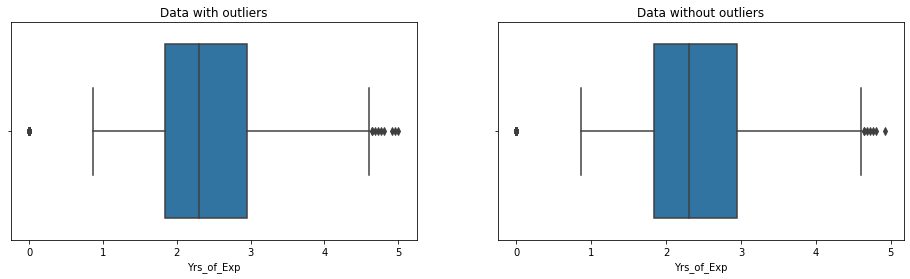

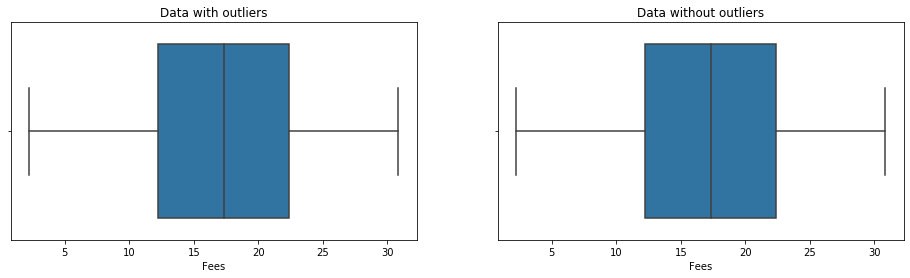

In [62]:
# before and after removing the outliers
for col in num_var:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df_train[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_final[col])
    plt.title('Data without outliers')

In [63]:
# Splitting the target Variable
x = df_final.drop('Fees',1)
y = df_final['Fees']

In [64]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (4766, 20)
Shape of y_train =  (4766,)
Shape of x_test =  (1192, 20)
Shape of y_test =  (1192,)


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [66]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=0.1 , random_state= 75)
RI=Ridge(alpha=0.1 , random_state= 75)
EN=ElasticNet(alpha=0.1 , random_state= 75)
KNR=KNeighborsRegressor(n_neighbors= 4)
DTR=DecisionTreeRegressor(random_state= 65)
ABR=AdaBoostRegressor(random_state= 95)
RFR=RandomForestRegressor(random_state= 54)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=65)
XGR=XGBRegressor(random_state = 61)

In [67]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [68]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(round(r2,3))
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y).mean()    
    cvs.append(round(score,3))

In [69]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
print(result.sort_values(by = 'R2_score',ascending=True))

                       Model  R2_score  Mean_Squared_Error  Cross_val_score
4      DecisionTreeRegressor    -0.179              34.859           -0.166
5        KNeighborsRegressor    -0.052              31.102            0.002
7      RandomForestRegressor    -0.027              30.353            0.006
9               XGBRegressor     0.023              28.885            0.072
8  GradientBoostingRegressor     0.104              26.493            0.110
6          AdaBoostRegressor     0.119              26.056            0.115
1                      Lasso     0.131              25.698            0.140
3                 ElasticNet     0.132              25.666            0.143
0           LinearRegression     0.133              25.623            0.146
2                      Ridge     0.133              25.623            0.146


In [70]:
best_model = Ridge()

In [71]:
best_model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
best_model.score(x_test,y_test)

0.1332931361341545

# Testing on the Test set

In [73]:
df_test.drop('Fees',1,inplace=True)

In [74]:
test_prediction = best_model.predict(df_test)

In [75]:
test_prediction

array([16.24540327, 18.63099055, 18.02591382, ..., 16.51418281,
       16.02637332, 18.41824464])

In [76]:
pd.DataFrame(test_prediction,columns=['Fees']).to_csv('test_result.csv')

In [77]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'Doctors_consul.pkl')

['Doctors_consul.pkl']